In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags ,eye 
from skimage import metrics
from skimage.io import imread , imshow

In [40]:
def noise(img,sigma):
    noisy_img = img + np.random.randn(*img.shape)*sigma
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
    return noisy_img

In [41]:
def LS_DEN(img,lam):
    M,N=img.shape
    e = np.ones((M,1))
    D = spdiags(np.hstack((e,-2*e,e)).T,[0,1,2],M,M)
    F =eye(M).toarray() + lam*(D.T@D)
    x=np.linalg.solve(F,img)
    return x;
    

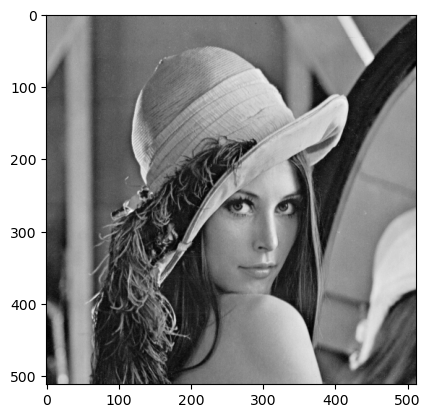

In [42]:
path = r'D:\B_Tech_AIE\Semester_5\SIP\Week_9\2D_Image_Denoising_LS\Image_Smoothing\lena512.bmp'
img=imread(path,as_gray=True)
plt.imshow(img,cmap='gray')

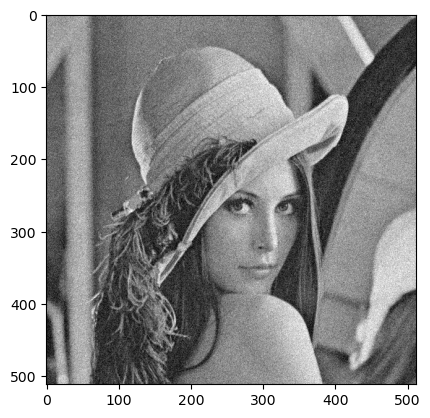

In [43]:
noise_img = noise(img,16)
plt.imshow(noise_img,cmap='gray')

In [44]:
lamda=0.9
yy1=LS_DEN(noise_img,lamda)

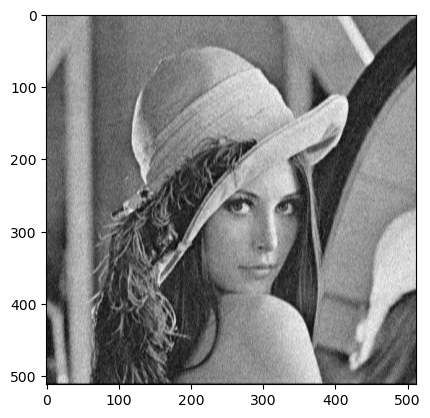

In [45]:
plt.imshow(yy1,cmap='gray')

In [46]:
psnr_denoised = round(metrics.peak_signal_noise_ratio(img,yy1.astype(np.uint8)),1)
psnr_denoised

28.4

In [47]:
psnr_noised = round(metrics.peak_signal_noise_ratio(img,noise_img.astype(np.uint8)),1)
psnr_noised 

24.1